In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)
# del X_train,X_test

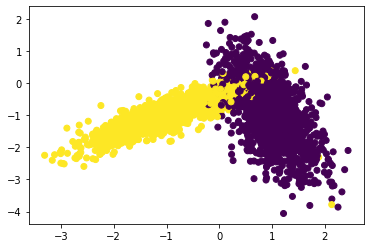

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
## 1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
## ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50

import random
def param_range(start,end):
    params=random.sample(range(start,end),10)
    return params
params=param_range(1,50)
params.sort()
print(params)

[4, 9, 11, 12, 13, 18, 24, 33, 35, 42]


In [4]:
## to see the value of x and y
print(x,y)

[[ 0.9944479  -1.51666697]
 [-0.3404792  -0.39546072]
 [-0.92978    -1.44854911]
 ...
 [-2.91953119 -1.96829635]
 [ 0.1717912  -1.53408936]
 [-2.54105874 -1.67856635]] [0 1 1 ... 1 0 1]


In [5]:
# check the length of X_train and y_train
print(len(X_train),len(y_train))

7500 7500


In [6]:
# Function to split the dataset into number of folds and return the list of list with combined dataset
def split_3groups(a,fold):
    my_list = list(range(a))
    n = int(len(my_list)/fold)
    
    ## to split the data set into number of folds say 3
    temp=[]
    n_split=np.array_split(my_list,fold)
    for array in n_split:
        temp1=(list(array))
        temp.append(temp1)
    
    ## combined the dataset into desired groups say (1+2,1+3,2+3)
    top_lst=[]
    for j in range(len(temp)):
        lst=[]
        for i in range(len(temp)):
            if(i!= len(temp)-1-j):
                t=temp[i]
                lst.extend(t)
                #print (temp[i],end='')   
        top_lst.append(lst)
       # print()
      #  print(lst)
    #print(top_lst)
    return top_lst

In [7]:
## it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
## we are implementing this only for KNN, the hyper parameter
def RandomSearch(x_train,y_train,classifier, params, folds):
    
    trainscores = []
    testscores  = []    
    
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        # call the split function that divide the data into three list
        #train1,train2,train3=split_3groups(len(x_train),folds)
        
        groups=split_3groups(len(x_train),folds)
        #print(groups)
        
        #temp=[train1,train2,train3]
                
        for j in range(0, folds):
            
            train_indices=groups[j]
            test_indices  = list(set(list(range(1,len(x_train)))) - set(train_indices))
                                 
            #print(x_train[train_indices])
            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores
    

100%|██████████| 10/10 [00:06<00:00,  1.41it/s]


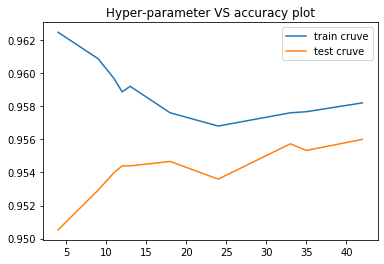

In [8]:
## call the random search function and plot the Hyper parameter and accuracy plot
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
folds = 3
trainscores,testscores = RandomSearch(X_train, y_train, neigh, params, folds)
 
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [9]:
# function to create the decision boundary and scatter plot
def plot_decision_boundary(X1, X2, y, clf):
        
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

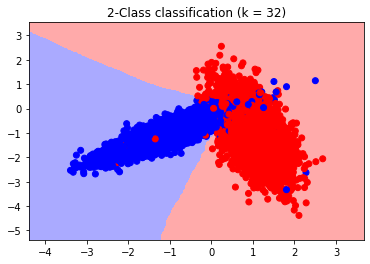

In [10]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 32)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)